In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Dataset/subjects-questions.csv')

In [3]:
df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [4]:
df.shape

(122519, 2)

In [20]:
subject_values=df['Subject'].value_counts()


([<matplotlib.patches.Wedge at 0x19d87753350>,
 [Text(-0.21876987147045981, 1.078025854669914, 'Physics'),
  Text(-0.9180269146188288, -0.6059922310025384, 'Chemistry'),
  Text(0.8132855106627895, -0.7406528729073869, 'Maths'),
  Text(0.9910282576492103, 0.4773499686192202, 'Biology')],
 [Text(-0.11932902080206897, 0.5880141025472257, '31.4%'),
  Text(-0.500741953428452, -0.3305412169104755, '30.8%'),
  Text(0.4436102785433397, -0.4039924761313019, '27.1%'),
  Text(0.5405608678086601, 0.26037271015593827, '10.7%')])

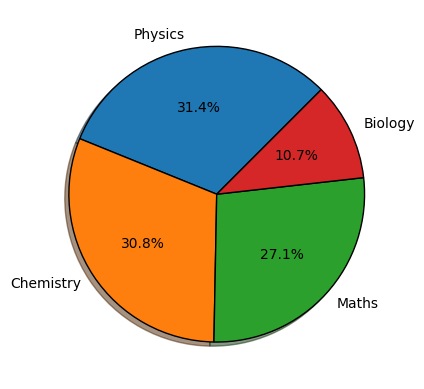

In [21]:
plt.pie(subject_values.values,labels=subject_values.index,shadow=True,startangle=45,wedgeprops={"edgecolor":"black"},autopct='%1.1f%%')

Checking for missing values 


In [22]:
df.isnull().sum()

eng        0
Subject    0
dtype: int64

As we can see that we dont have any missing values in our dataset.
Now we will go ahead with cleaning out text

In [23]:
df['eng']

0         An anti-forest measure is\nA. Afforestation\nB...
1         Among the following organic acids, the acid pr...
2         If the area of two similar triangles are equal...
3         In recent year, there has been a growing\nconc...
4         Which of the following statement\nregarding tr...
                                ...                        
122514    Which of the following group of\ncharacters is...
122515    Light year is the\nA. light emitted by the sun...
122516    Member of Dipnoi are native of\nA. India.\nB. ...
122517    In one average-life,\nA. half the active nucle...
122518    State whether true or false.\nA magnetic field...
Name: eng, Length: 122519, dtype: object

First we convert evrything into lower case for better understanding

In [25]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_question'] = df['eng'].apply(clean_text)
df[['eng','clean_question']].head()


,eng,clean_question
0,An anti-forest measure is\nA. Afforestation\nB...,an antiforest measure is a afforestation b sel...
1,"Among the following organic acids, the acid pr...",among the following organic acids the acid pre...
2,If the area of two similar triangles are equal...,if the area of two similar triangles are equal...
3,"In recent year, there has been a growing\nconc...",in recent year there has been a growing concer...
4,Which of the following statement\nregarding tr...,which of the following statement regarding tra...


When we compare eng text and cleaned question we can see that our text has been converted into lowercase letters and there is no unwanted characters 

We save this csv file and apply stemming/lemmatization in the next notebook. Then we go ahead and train our model.


In [26]:
df.to_csv("../Dataset/Cleaned_Data.csv",index=False)

Shape-(122519, 2)


In [27]:
subject_values

Subject
Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: count, dtype: int64